In [2]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
duke_file = "audio/duke.wav"

duke, sr = librosa.load(duke_file)
sr

22050

In [5]:
# convert to fft
duke_fft = np.fft.fft(duke)
duke_magnitude = np.abs(duke_fft)

In [12]:
plt.figure(figsize=(18,5))
frequency = np.linspace(0,sr,len(duke_magnitude))
frequency

array([0.00000000e+00, 3.33333837e-02, 6.66667674e-02, ...,
       2.20499333e+04, 2.20499667e+04, 2.20500000e+04])

<Figure size 1800x500 with 0 Axes>

In [16]:
num_frequencybins = int(len(frequency)/2)
num_frequencybins

330750

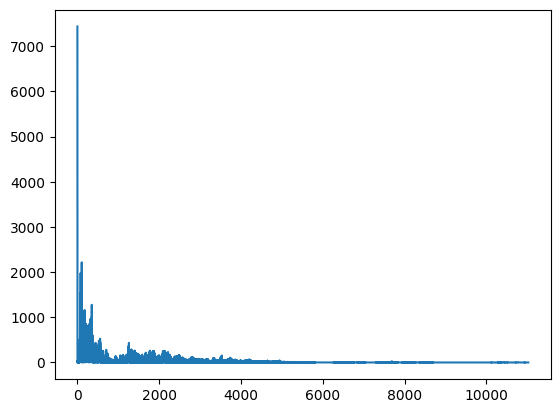

In [18]:
plt.plot(frequency[:num_frequencybins],duke_magnitude[:num_frequencybins])

In [19]:
# convert to stft
stft_duke = librosa.stft(duke,hop_length=512)

In [25]:
stft_duke_to_power = np.abs(stft_duke) 

In [29]:
# convert to logarithmic 
log_duke = librosa.amplitude_to_db(stft_duke_to_power)

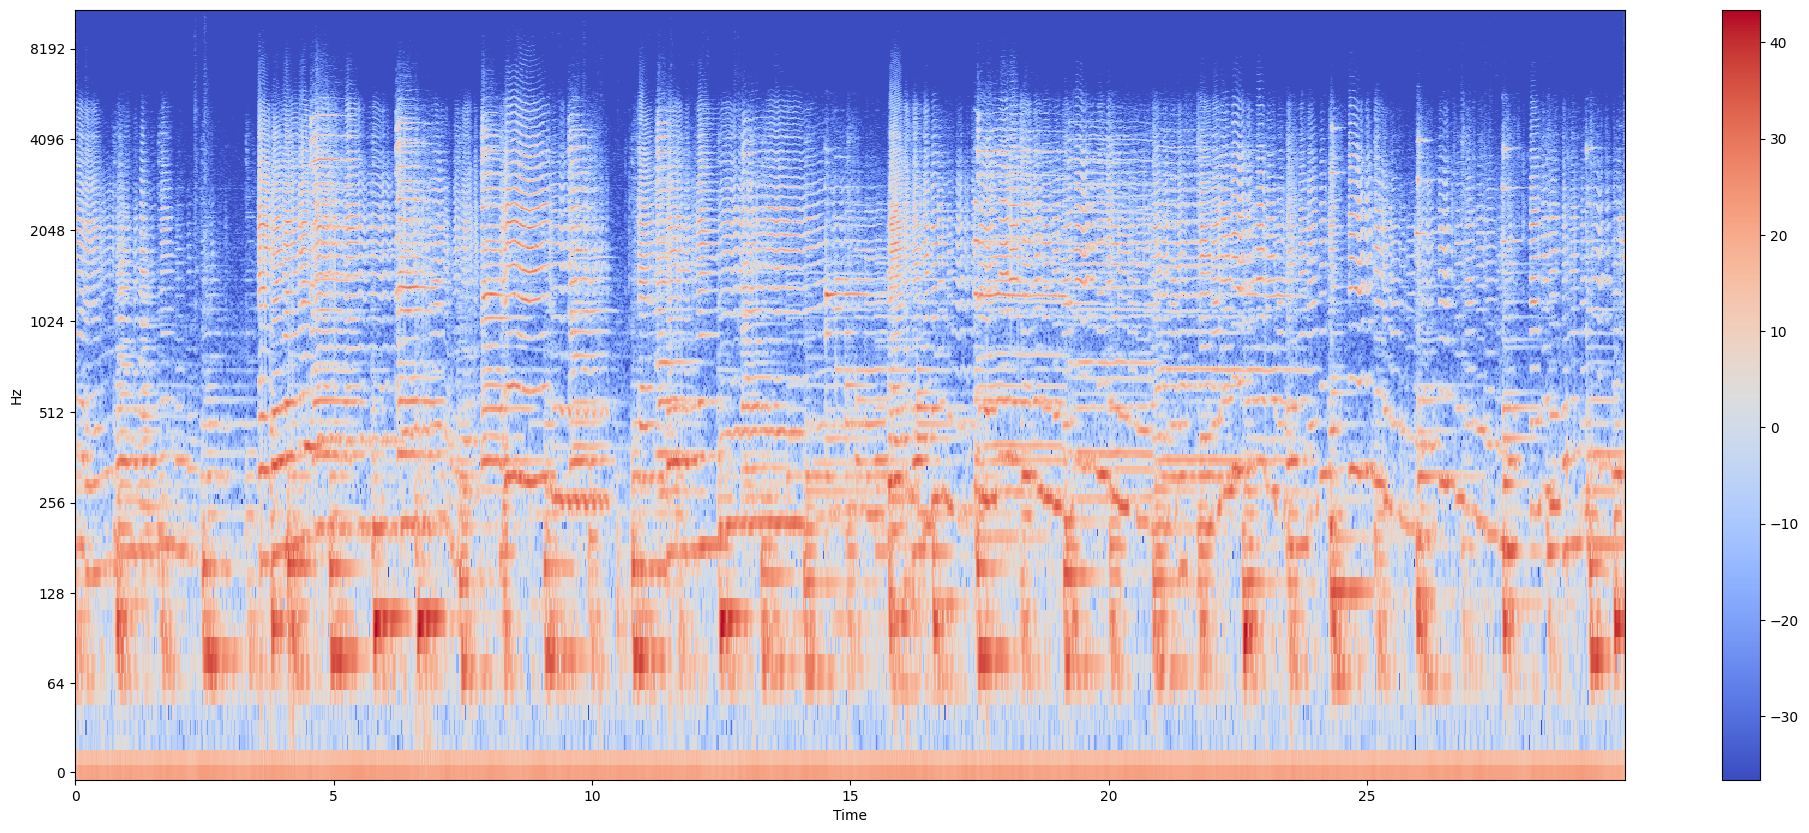

In [34]:
plt.figure(figsize=(25,10))
librosa.display.specshow(log_duke,sr=sr,hop_length=512,x_axis="time",y_axis="log")
plt.colorbar()

In [50]:
# getting the mfcc

mfcc_duke = librosa.feature.mfcc(y=duke,n_mfcc=20,sr=sr,n_fft=2048,hop_length=512)
mfcc_duke_to_db = librosa.power_to_db(mfcc_duke)

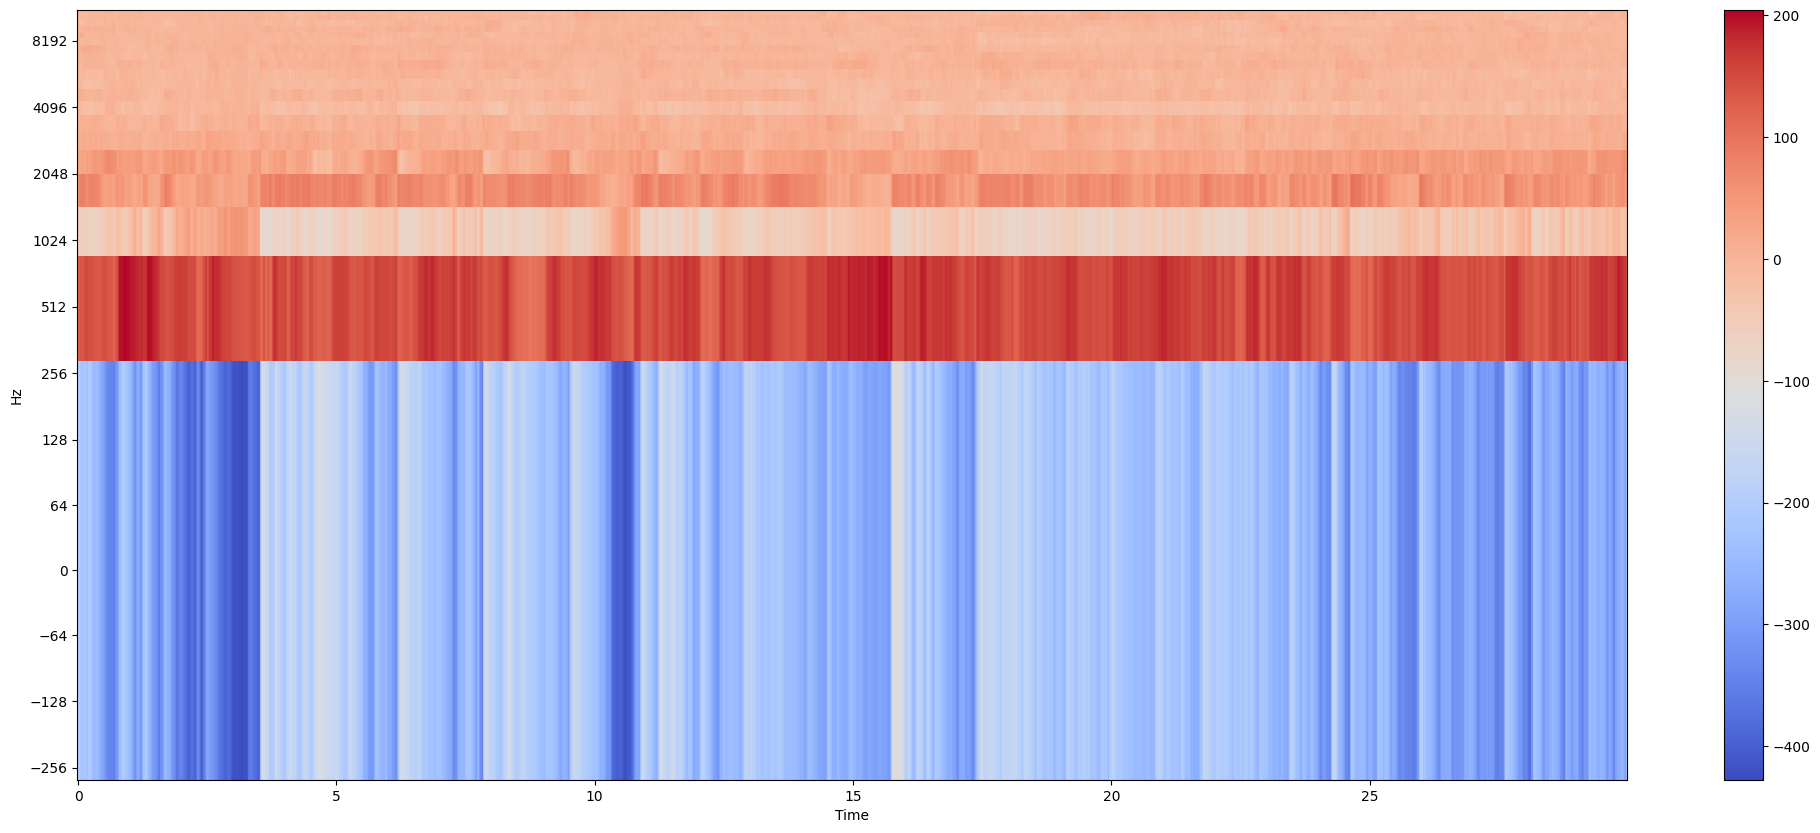

In [51]:
plt.figure(figsize=(25,10))
librosa.display.specshow(mfcc_duke,sr=sr,hop_length=512,x_axis="time",y_axis="log")
plt.colorbar()